<a href="https://colab.research.google.com/github/MagaliDrumare/Nexusflow-Function-Calling/blob/main/Lesson_2_Student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Function Calling

### Housekeeping

In [1]:
def afunction(arg1:int = 0, arg2:str = "hello", **kwargs)->int:
    ''' this is a function definition
        arg1 (int): an exemplary yet modest argument
        arg2 (str): another nice argument
        **kwargs : the rest of the rabble

        returns arg1 incremented by one
    '''
    return(arg + 1)

In [2]:
print(afunction.__name__)
print(afunction.__doc__)

afunction
 this is a function definition
        arg1 (int): an exemplary yet modest argument
        arg2 (str): another nice argument
        **kwargs : the rest of the rabble 

        returns arg1 incremented by one
    


In [3]:
import inspect
print(inspect.signature(afunction))

(arg1: int = 0, arg2: str = 'hello', **kwargs) -> int


##### Building User Query
> Note, the video shows how to access utils.py in Jupyter Notebook V7.   
> You may be in Jupyter Notebook V6. To access it in this version, on the menu, choose File->Open.

In [8]:
import inspect
def build_raven_prompt(function_list, user_query):
    raven_prompt = ""
    for function in function_list:
        signature = inspect.signature(function)
        docstring = function.__doc__
        prompt = \
f'''
Function:
def {function.__name__}{signature}
    """
    {docstring.strip()}
    """

'''
        raven_prompt += prompt

    raven_prompt += f"User Query: {user_query}<human_end>"
    return raven_prompt


In [9]:
print( build_raven_prompt([afunction], "a query"))


Function:
def afunction(arg1: int = 0, arg2: str = 'hello', **kwargs) -> int
    """
    this is a function definition
        arg1 (int): an exemplary yet modest argument
        arg2 (str): another nice argument
        **kwargs : the rest of the rabble 

        returns arg1 incremented by one
    """
    
User Query: a query<human_end>


### Concrete Example For Parallel Calls

In [10]:
from utils import draw_clown_face

raven_msg = "Hey, can you build me two clowns." \
"The first clown should be red faced, with a blue nose" \
"and a mouth from 0 to 180 degrees. The mouth should be black." \
"The second clown should have a blue face and a green nose" \
"and a red mouth that's 180 to 360 degrees."

#### Building Raven Prompt

In [11]:
raven_prompt = build_raven_prompt([draw_clown_face], raven_msg)

print (raven_prompt)


Function:
def draw_clown_face(face_color='yellow', eye_color='black', nose_color='red', eye_size=0.05, mouth_size=(0.3, 0.1), mouth_color='black', eye_offset=(0.15, 0.15), mouth_theta=(200, 340))
    """
    Draws a customizable, simplified clown face using matplotlib.

    Parameters:
    - face_color (str): Color of the clown's face. Default is 'yellow'.
    - eye_color (str): Color of the clown's eyes. Default is 'black'.
    - nose_color (str): Color of the clown's nose. Default is 'red'.
    - eye_size (float): Radius of the clown's eyes. Default is 0.05.
    - mouth_size (tuple): Width and height of the clown's mouth arc. Default is (0.3, 0.1).
    - eye_offset (tuple): Horizontal and vertical offset for the eyes from the center. Default is (0.15, 0.15).
    - mouth_theta (tuple): Starting and ending angles (in degrees) of the mouth arc. Default is (200, 340).

    This function creates a plot displaying a simplified clown face, where essential facial features' size, position, a

draw_clown_face(face_color='red', nose_color='blue', mouth_color='black', mouth_theta=(0, 180)); draw_clown_face(face_color='blue', nose_color='green', mouth_color='red', mouth_theta=(180, 360));


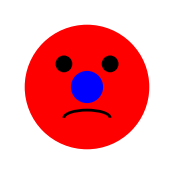

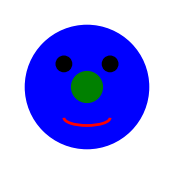

In [12]:
from utils import query_raven
raven_call = query_raven(raven_prompt)
print (raven_call)
exec(raven_call)

### Using Multiple Functions!

#### Building The Prompt

In [13]:
from utils import draw_clown_face, draw_tie
raven_msg = "Hey draw a tie?"
raven_prompt = build_raven_prompt\
    ([draw_clown_face, draw_tie], raven_msg)

In [14]:
print(raven_prompt)


Function:
def draw_clown_face(face_color='yellow', eye_color='black', nose_color='red', eye_size=0.05, mouth_size=(0.3, 0.1), mouth_color='black', eye_offset=(0.15, 0.15), mouth_theta=(200, 340))
    """
    Draws a customizable, simplified clown face using matplotlib.

    Parameters:
    - face_color (str): Color of the clown's face. Default is 'yellow'.
    - eye_color (str): Color of the clown's eyes. Default is 'black'.
    - nose_color (str): Color of the clown's nose. Default is 'red'.
    - eye_size (float): Radius of the clown's eyes. Default is 0.05.
    - mouth_size (tuple): Width and height of the clown's mouth arc. Default is (0.3, 0.1).
    - eye_offset (tuple): Horizontal and vertical offset for the eyes from the center. Default is (0.15, 0.15).
    - mouth_theta (tuple): Starting and ending angles (in degrees) of the mouth arc. Default is (200, 340).

    This function creates a plot displaying a simplified clown face, where essential facial features' size, position, a

#### Getting The Call

In [15]:
raven_call = query_raven(raven_prompt)
print (raven_call)

draw_tie()


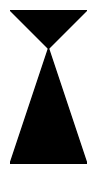

In [16]:
exec(raven_call)

### Multiple Parallel Function Calling

#### Build The Prompt

In [17]:
raven_msg = "Draw a clown and a tie?"

In [18]:
raven_prompt = build_raven_prompt([draw_tie, draw_clown_face], raven_msg)
raven_call = query_raven(raven_prompt)

In [19]:
print (raven_call)

draw_clown_face(face_color='yellow', eye_color='black', nose_color='red', eye_size=0.05, mouth_size=(0.3, 0.1), mouth_color='black', eye_offset=(0.15, 0.15), mouth_theta=(200, 340)); draw_tie()


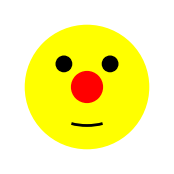

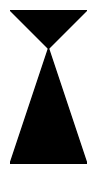

In [20]:
exec(raven_call)

### What is the significance of the docstrings?

In [ ]:
raven_msg = "Draw me a sad one with green head"
raven_prompt = build_raven_prompt([draw_clown_face], raven_msg)
raven_call = query_raven(raven_prompt)
print (raven_call)
exec(raven_call)

#### Fixing The Function Docstring

In [ ]:
print (raven_prompt)

In [ ]:
raven_prompt_targeted = \
'''
Function:
def draw_clown_face(face_color='yellow', eye_color='black', nose_color='red', eye_size=0.05, mouth_size=(0.3, 0.1), mouth_color='black', eye_offset=(0.15, 0.15), mouth_theta=(200, 340))
    """
    Draws a customizable, simplified clown face using matplotlib.

    Parameters:
    - face_color (str): Color of the clown's face. Default is 'yellow'.
    - eye_color (str): Color of the clown's eyes. Default is 'black'.
    - nose_color (str): Color of the clown's nose. Default is 'red'.
    - eye_size (float): Radius of the clown's eyes. Default is 0.05.
    - mouth_size (tuple): Width and height of the clown's mouth arc. Default is (0.3, 0.1).
    - eye_offset (tuple): Horizontal and vertical offset for the eyes from the center. Default is (0.15, 0.15).
    - mouth_theta (tuple): Controls the emotions of the clown. Starting and ending angles (in degrees) of the mouth arc. Default is (200, 340).

    This function creates a plot displaying a simplified clown face, where essential facial features' size, position, and color can be customized.

    Example usage:
    draw_clown_face(face_color='lightblue', eye_color='green', nose_color='orange',
                    eye_size=0.07, mouth_size=(0.4, 0.25),
                    eye_offset=(0.2, 0.2), mouth_theta=(0, 180))

    # This will draw a simplified clown face with a light blue face, green eyes, an orange nose, and a smiling mouth.
    """

User Query: Draw me a sad one with green head<human_end>
'''

In [ ]:
raven_call = query_raven(raven_prompt_targeted)
print (raven_call)
exec(raven_call)

### Concrete Example For Nested APIs

In [21]:
raven_msg_nested = "Hey draw me a clown with "\
                    "a red face, blue eyes, green nose, "\
                    "and a black mouth open from 0 to 360 "\
                    "degrees?"

In [22]:
from utils import draw_head, draw_eyes, \
    draw_nose, draw_mouth, \
    draw_clown_face_parts
raven_function_nested = build_raven_prompt([draw_head, \
                                            draw_eyes, \
                                            draw_nose, \
                                            draw_mouth, \
                                            draw_clown_face_parts],\
                                            raven_msg_nested)
raven_call = query_raven(raven_function_nested)

In [23]:
print (raven_call)

draw_clown_face_parts(head=draw_head(face_color='red'), eyes=draw_eyes(eye_color='blue'), nose=draw_nose(nose_color='green'), mouth=draw_mouth(mouth_color='black', mouth_theta1=0, mouth_theta2=360))


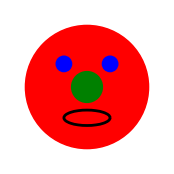

In [24]:
exec(raven_call)